In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings("ignore")

### Dataset exploration and basic analysis

In [3]:
df = pd.read_csv(".\\DATA\\Telco-Customer-Churn.csv")

In [4]:
df.head() # data set quick overview

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [6]:
df.isnull().sum()  # search for rows with missing data in every column

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
df = df.set_index("customerID")

In [8]:
for col in df:
    print(f"{col}:")
    print(df[col].unique())  # display unique values in each column

gender:
['Female' 'Male']
SeniorCitizen:
[0 1]
Partner:
['Yes' 'No']
Dependents:
['No' 'Yes']
tenure:
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService:
['No' 'Yes']
MultipleLines:
['No phone service' 'No' 'Yes']
InternetService:
['DSL' 'Fiber optic' 'No']
OnlineSecurity:
['No' 'Yes' 'No internet service']
OnlineBackup:
['Yes' 'No' 'No internet service']
DeviceProtection:
['No' 'Yes' 'No internet service']
TechSupport:
['No' 'Yes' 'No internet service']
StreamingTV:
['No' 'Yes' 'No internet service']
StreamingMovies:
['No' 'Yes' 'No internet service']
Contract:
['Month-to-month' 'One year' 'Two year']
PaperlessBilling:
['Yes' 'No']
PaymentMethod:
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges:
[29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges:

In [9]:
df.describe().transpose().drop("tenure")

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7032.0,0.162400,0.368844,0.00,0.0000,0.000,0.0000,1.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


In [10]:
df_dummies = pd.get_dummies(data=df)

In [11]:
correlations_to_yes = df_dummies.corr()[["Churn_Yes"]].sort_values("Churn_Yes")  

In [12]:
correlations = pd.DataFrame(data=correlations_to_yes, index=correlations_to_yes.index)
correlations = correlations.drop(["Churn_Yes", "Churn_No"])
#create data frame presenting how each column is correlated to churn equal to yes

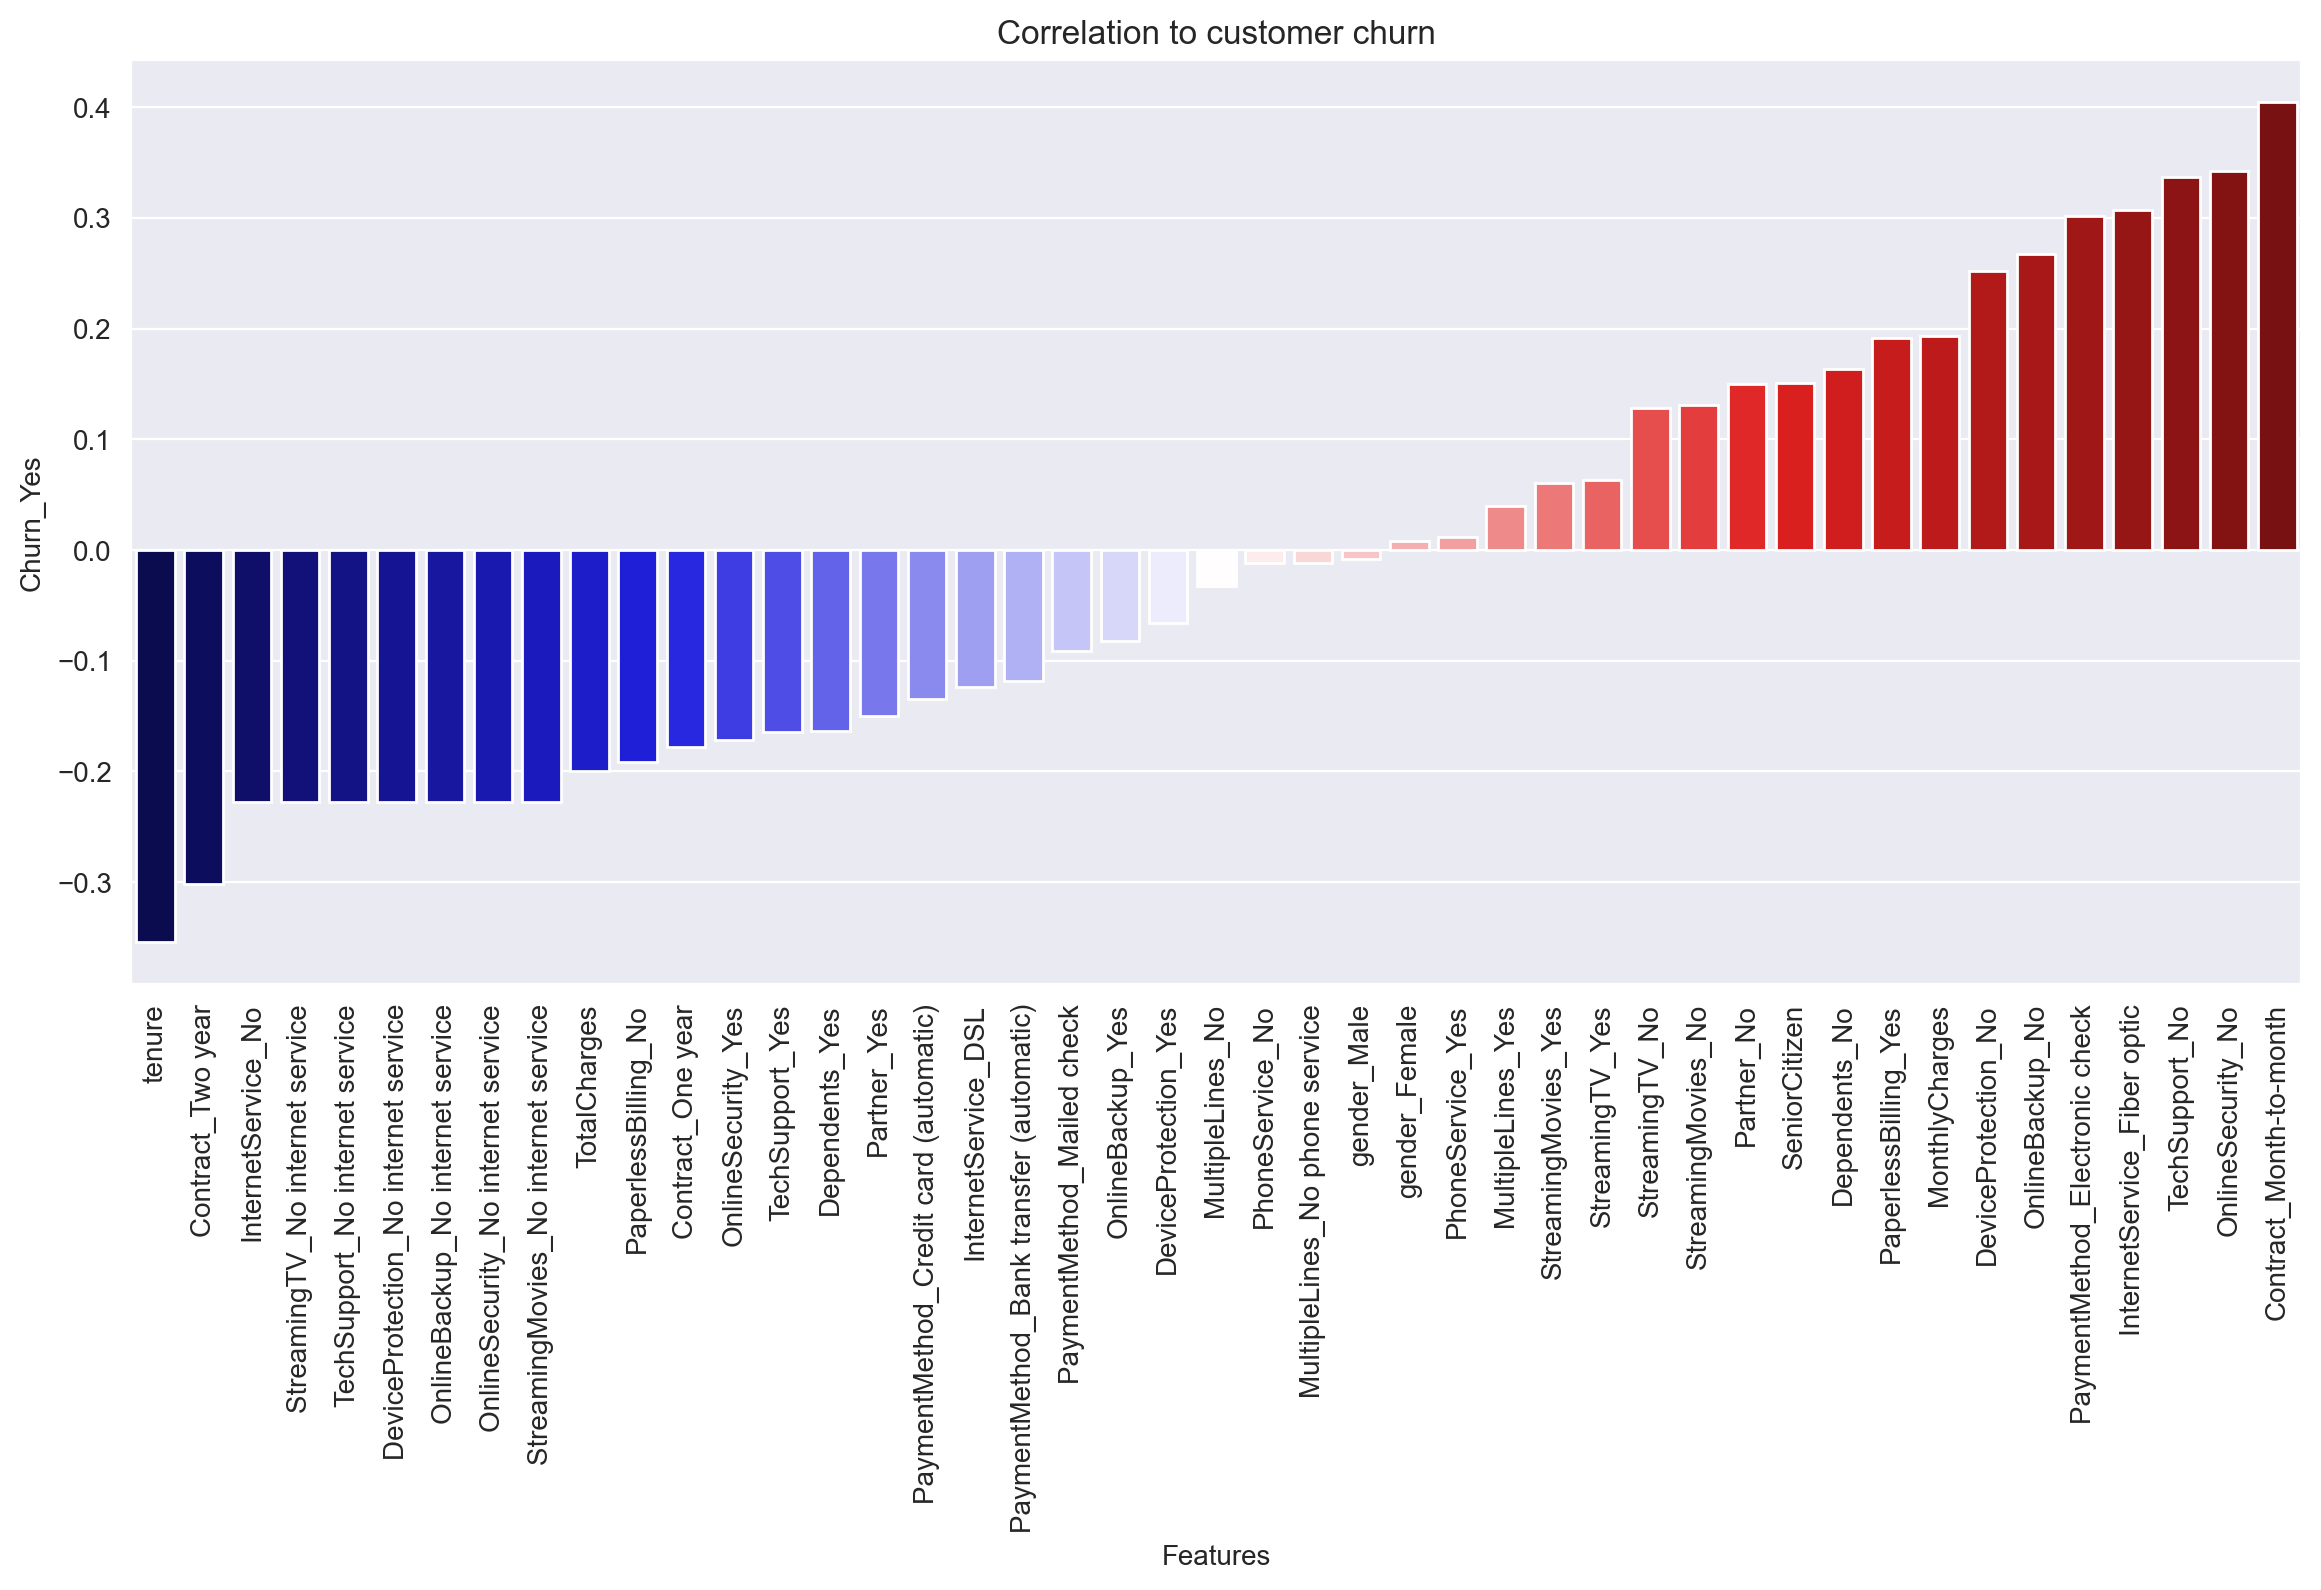

In [13]:
plt.figure(figsize=(14, 6), dpi=200)
sns.barplot(data=correlations, x=correlations.index, y="Churn_Yes", palette="seismic")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.title("Correlation to customer churn");  # present above correlations on the bar plot

### Analysis of most correlated features
According to above plot the most correlated features are: method of payment, contract type, tenure and charges

Text(0.5, 1.0, 'Payment Method vs Churn')

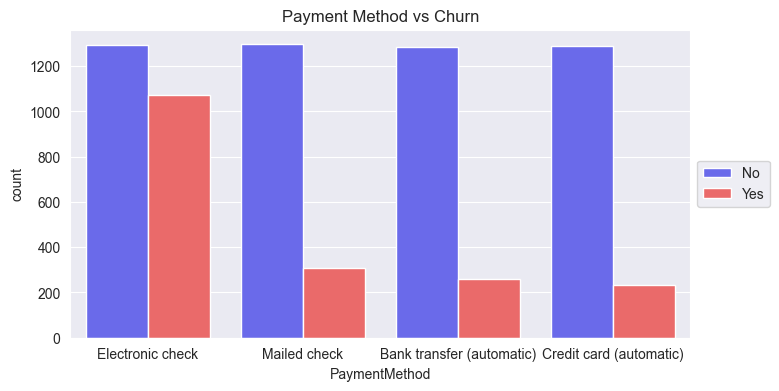

In [14]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="PaymentMethod", hue="Churn", palette="seismic")
plt.legend(loc="center left", bbox_to_anchor=(1, 0.5))
plt.title("Payment Method vs Churn")
# conclusion: Automatic methods of payment seems to prevent customers from churn

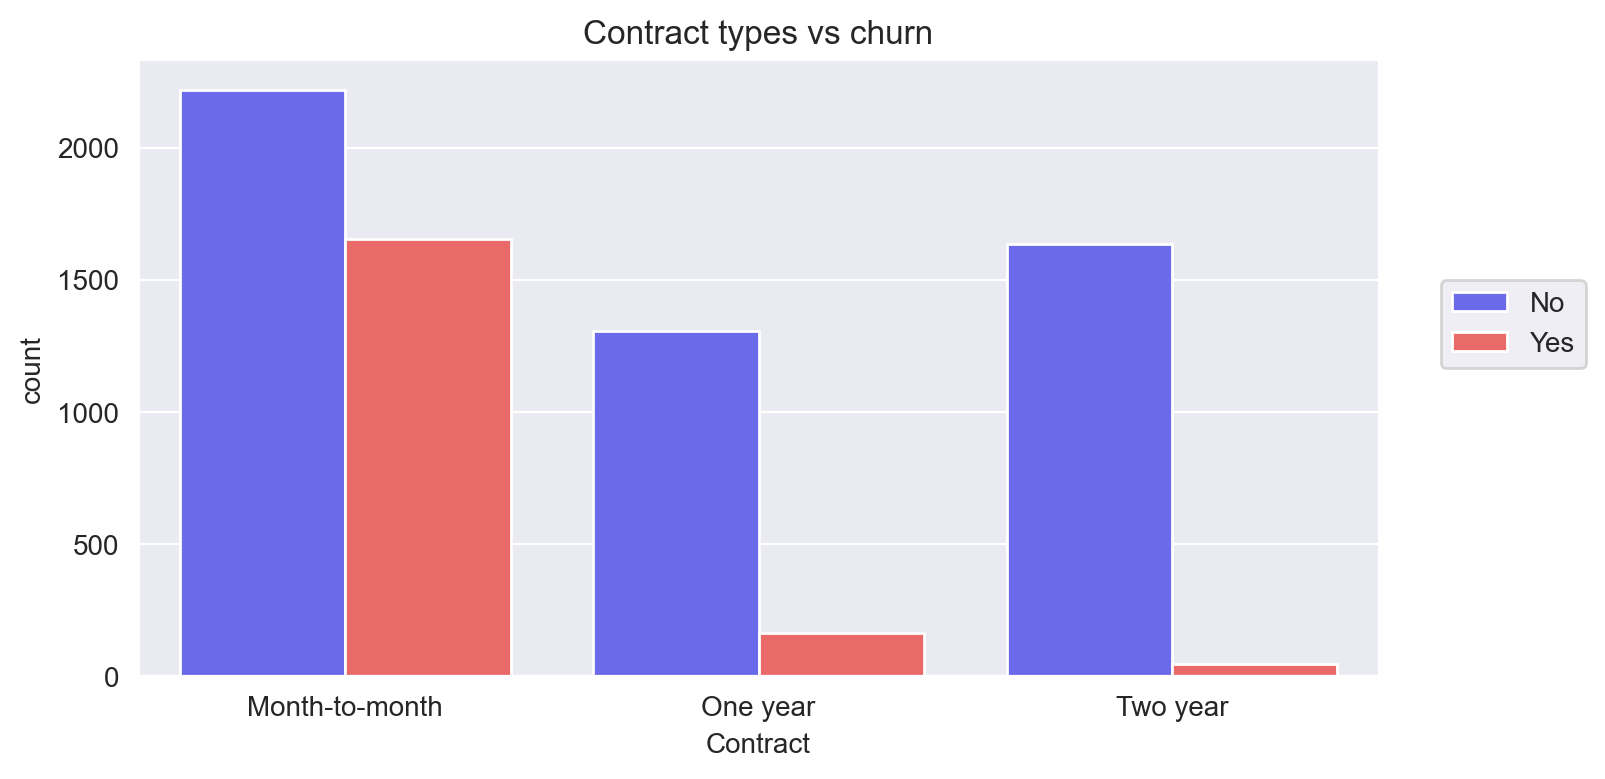

In [15]:
plt.figure(figsize=(8, 4), dpi=200)
sns.countplot(data=df, x="Contract", hue="Churn", palette="seismic")
plt.title("Contract types vs churn")
plt.legend(loc=(1.05, 0.5))
# conclusion: the longer contracts customers have, the less possibility of their churn

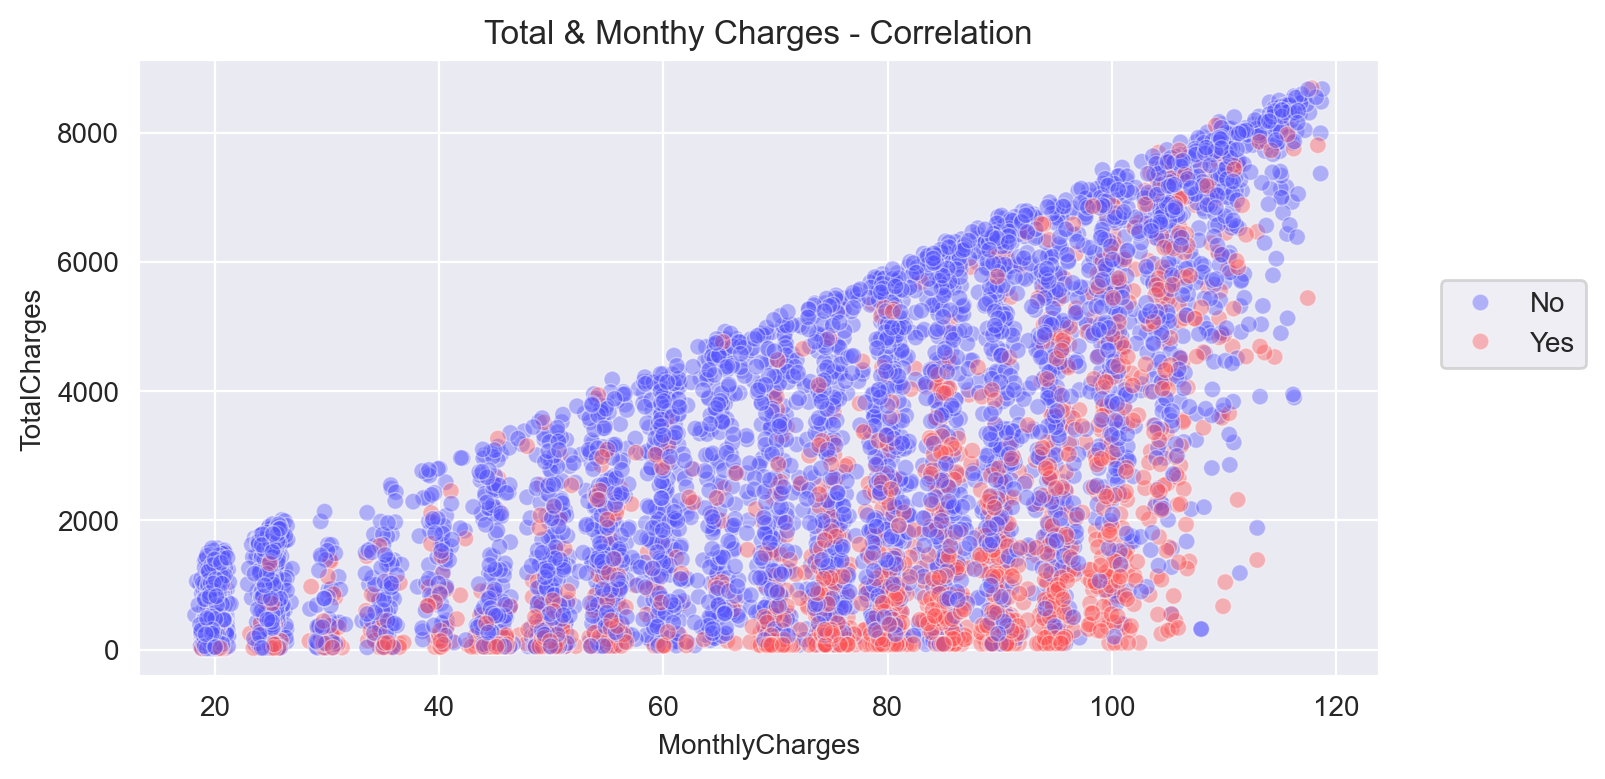

In [16]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(
    data=df,
    x="MonthlyCharges",
    y="TotalCharges",
    alpha=0.4,
    hue="Churn",
    palette="seismic",
    linewidth=0.5,
)
plt.legend(loc=(1.05, 0.5))
plt.title("Total & Monthy Charges - Correlation"); # explore correlation between monthly and total charges, conclusion: the more total charges customer have, the less possibility of their churn

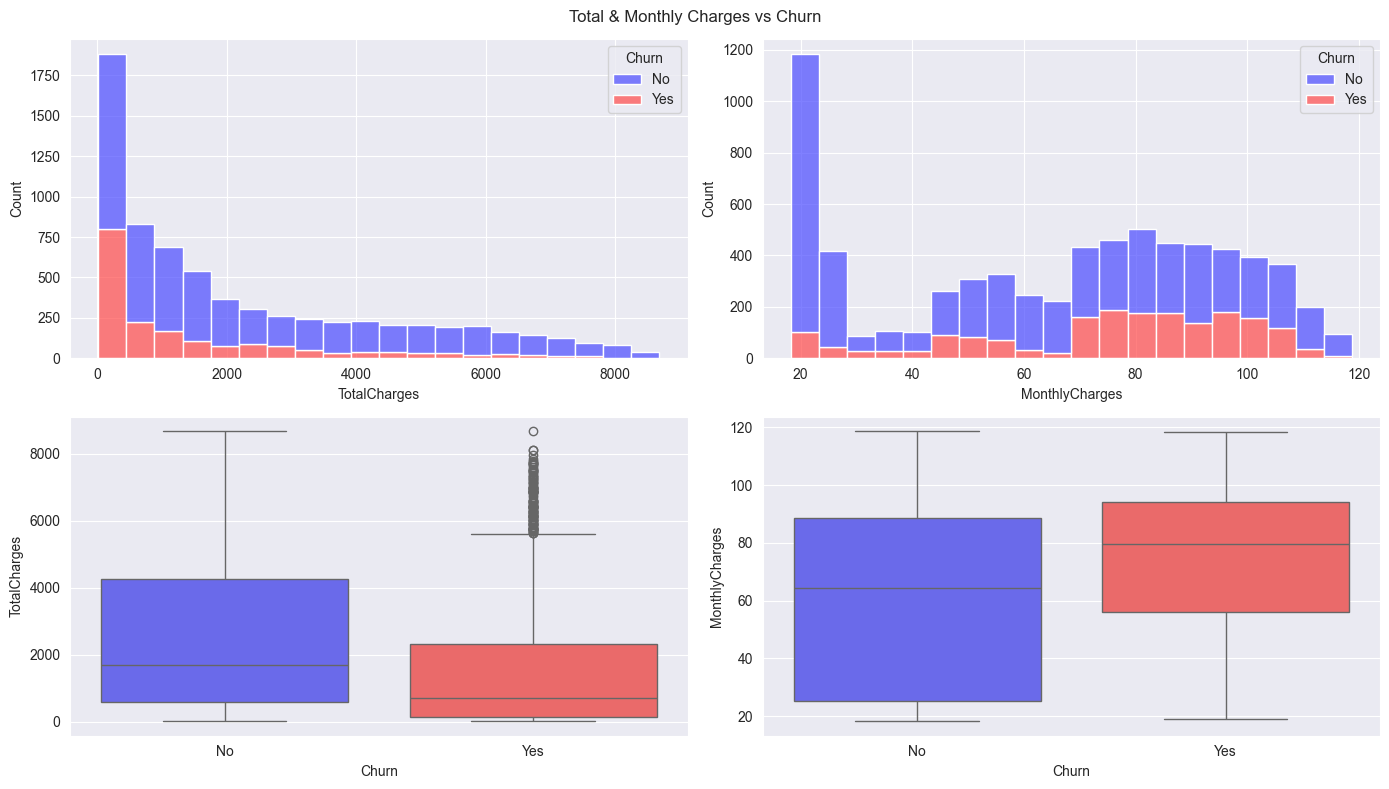

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 8))
sns.histplot(
    data=df,
    x="TotalCharges",
    hue="Churn",
    ax=axes[0][0],
    bins=20,
    palette="seismic",
    multiple="stack",
)
sns.histplot(
    data=df,
    x="MonthlyCharges",
    hue="Churn",
    ax=axes[0][1],
    bins=20,
    palette="seismic",
    multiple="stack",
)
sns.boxplot(data=df, x="Churn", y="TotalCharges", ax=axes[1][0], palette="seismic")
sns.boxplot(data=df, x="Churn", y="MonthlyCharges", ax=axes[1][1], palette="seismic")
fig.suptitle("Total & Monthly Charges vs Churn")
fig.tight_layout();
# conclusion: The more total charges and the less monthly charges customer have, the less possibility of their churn

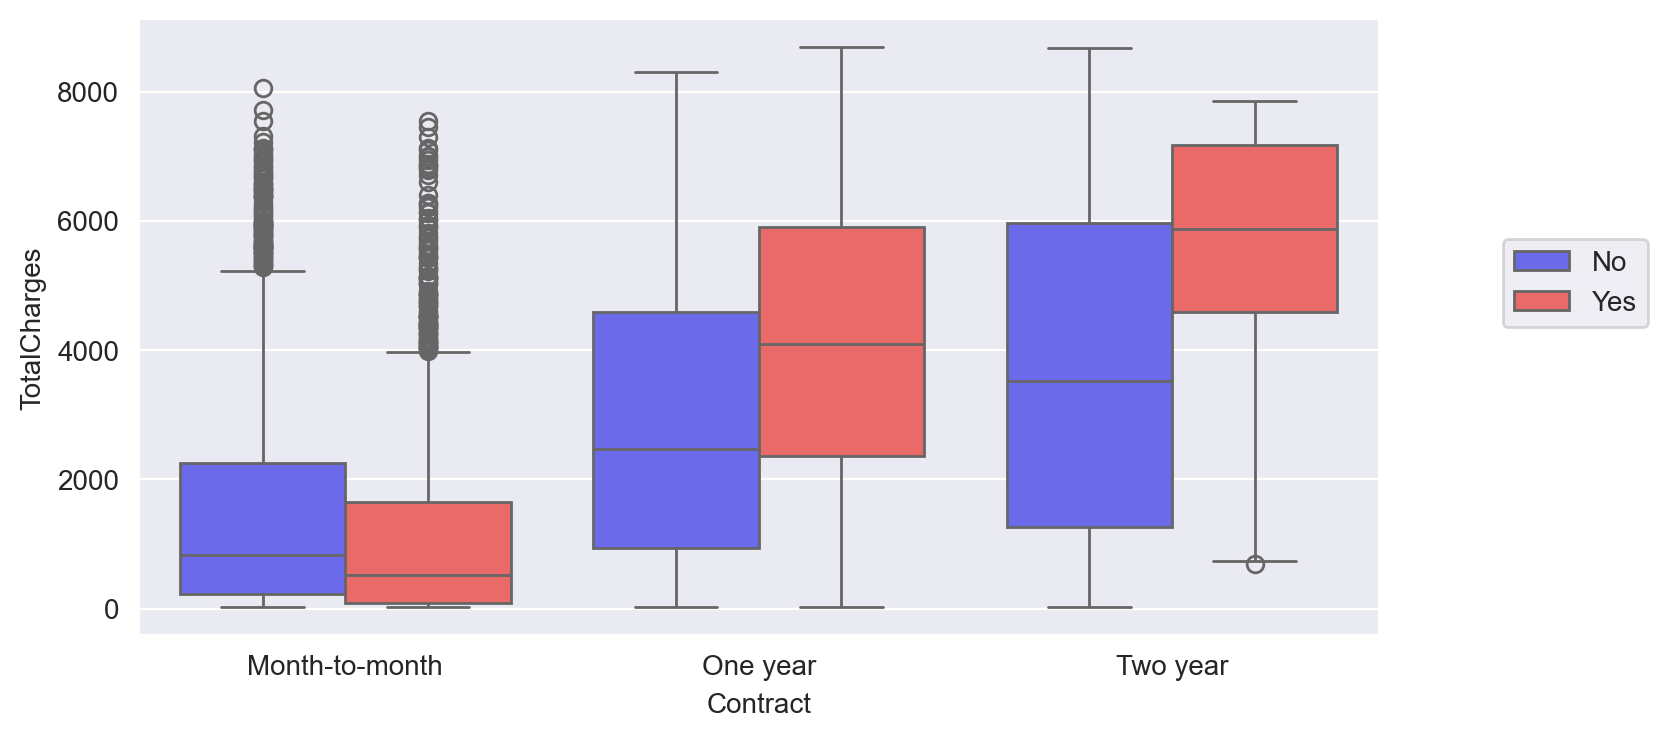

In [18]:
plt.figure(figsize=(8, 4), dpi=200)
sns.boxplot(data=df, y="TotalCharges", x="Contract", hue="Churn", palette="seismic")
plt.legend(loc=(1.1, 0.5));
# Conclusion: for customers with longer contract: the one with higher total charges are more likely to churn (probably there is a simple explanation for that: because of the longer period of time customers pay more in total)

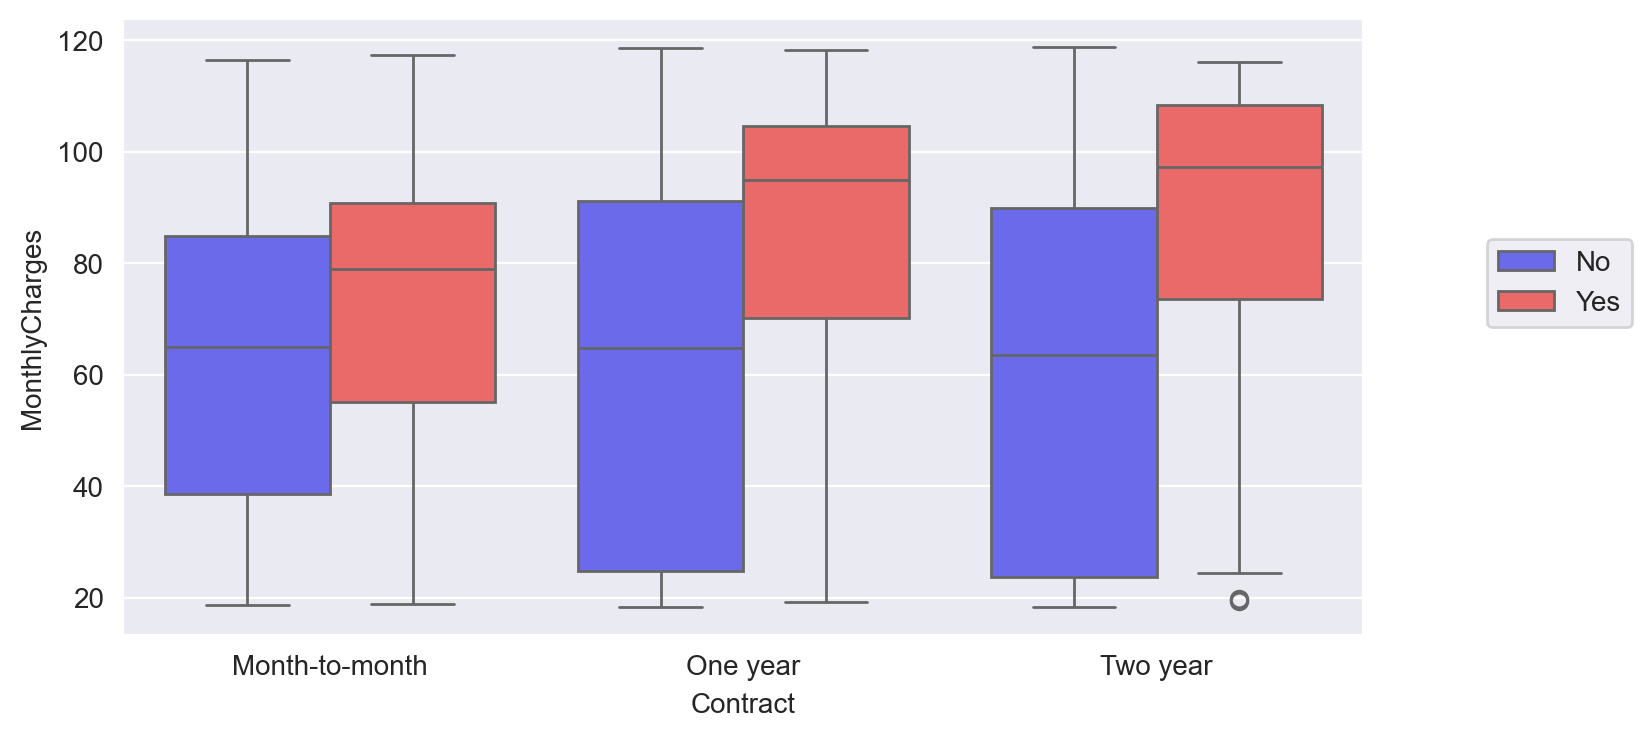

In [19]:
plt.figure(figsize=(8, 4), dpi=200)
sns.boxplot(data=df, y="MonthlyCharges", x="Contract", hue="Churn", palette="seismic")
plt.legend(loc=(1.1, 0.5));
# conclusion: regardless of contract type, the more monthly charges customers have, the more possibility of their churn

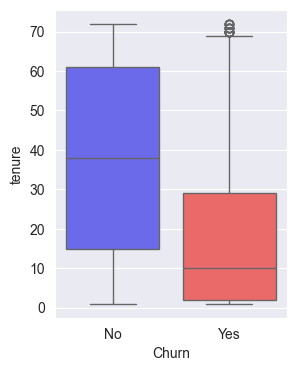

In [20]:
plt.figure(figsize=(3, 4))
sns.boxplot(data=df, x="Churn", y="tenure", palette="seismic");
# conclusion: customers with longer tenure are less likely to churn

<Figure size 1600x800 with 0 Axes>

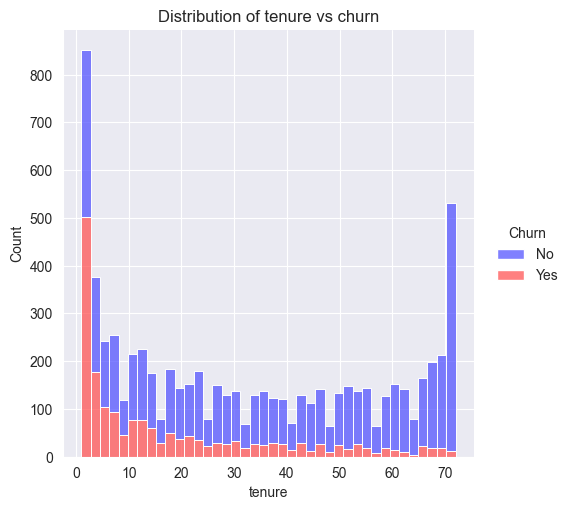

In [21]:
plt.figure(figsize=(8, 4), dpi=200)
sns.displot(
    data=df, x="tenure", bins=40, hue="Churn", palette="seismic", multiple="stack"
)
plt.title("Distribution of tenure vs churn");

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<Figure size 1600x1000 with 0 Axes>

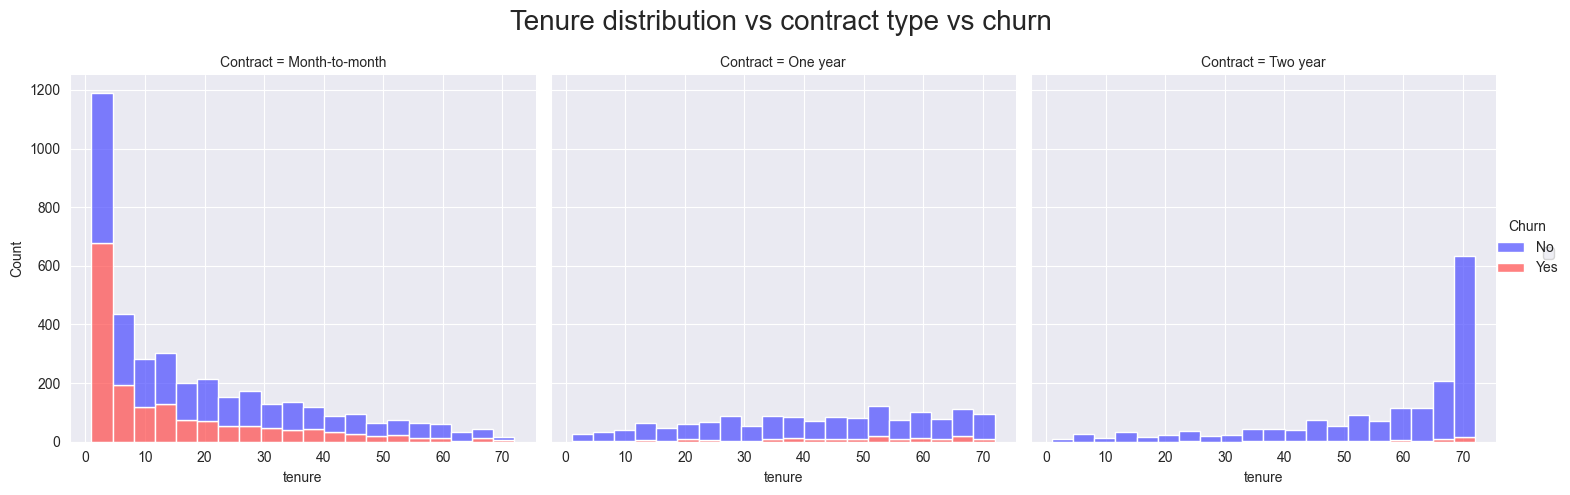

In [22]:
plt.figure(figsize=(8, 5), dpi=200)
sns.displot(
    data=df,
    x="tenure",
    col="Contract",
    bins=20,
    hue="Churn",
    palette="seismic",
    multiple="stack",
)
plt.suptitle("Tenure distribution vs contract type vs churn", size=20)
plt.legend(loc=(1.1, 0.5))
plt.tight_layout();

In [23]:
No_Churn = df.groupby(["Churn", "tenure"]).count().transpose()["No"]
Yes_Churn = df.groupby(["Churn", "tenure"]).count().transpose()["Yes"]
percentage = 100 * (Yes_Churn / (Yes_Churn + No_Churn)) # churn percentage (how many of whole clients churned in [%]) 

In [24]:
def cohort(tenure):
    """
    groups rows (customers) into three groups according to their tenure:
    1. Less or equal to 12 months
    2. Between 12 and 24 months
    3. Between 24 and 48 months
    4. More than 48 months
    :param tenure: param from data set for each client
    :return: str: group's name
    """
    if tenure <= 12:
        return "0-12 Months"
    elif 12 < tenure < 24:
        return "12-24 Months"
    elif 24 <= tenure <= 48:
        return "24-48 Months"
    else:
        return "Over 48 Months"

In [25]:
df["Tenure Cohort"] = df["tenure"].apply(lambda x: cohort(x))  # create new column 

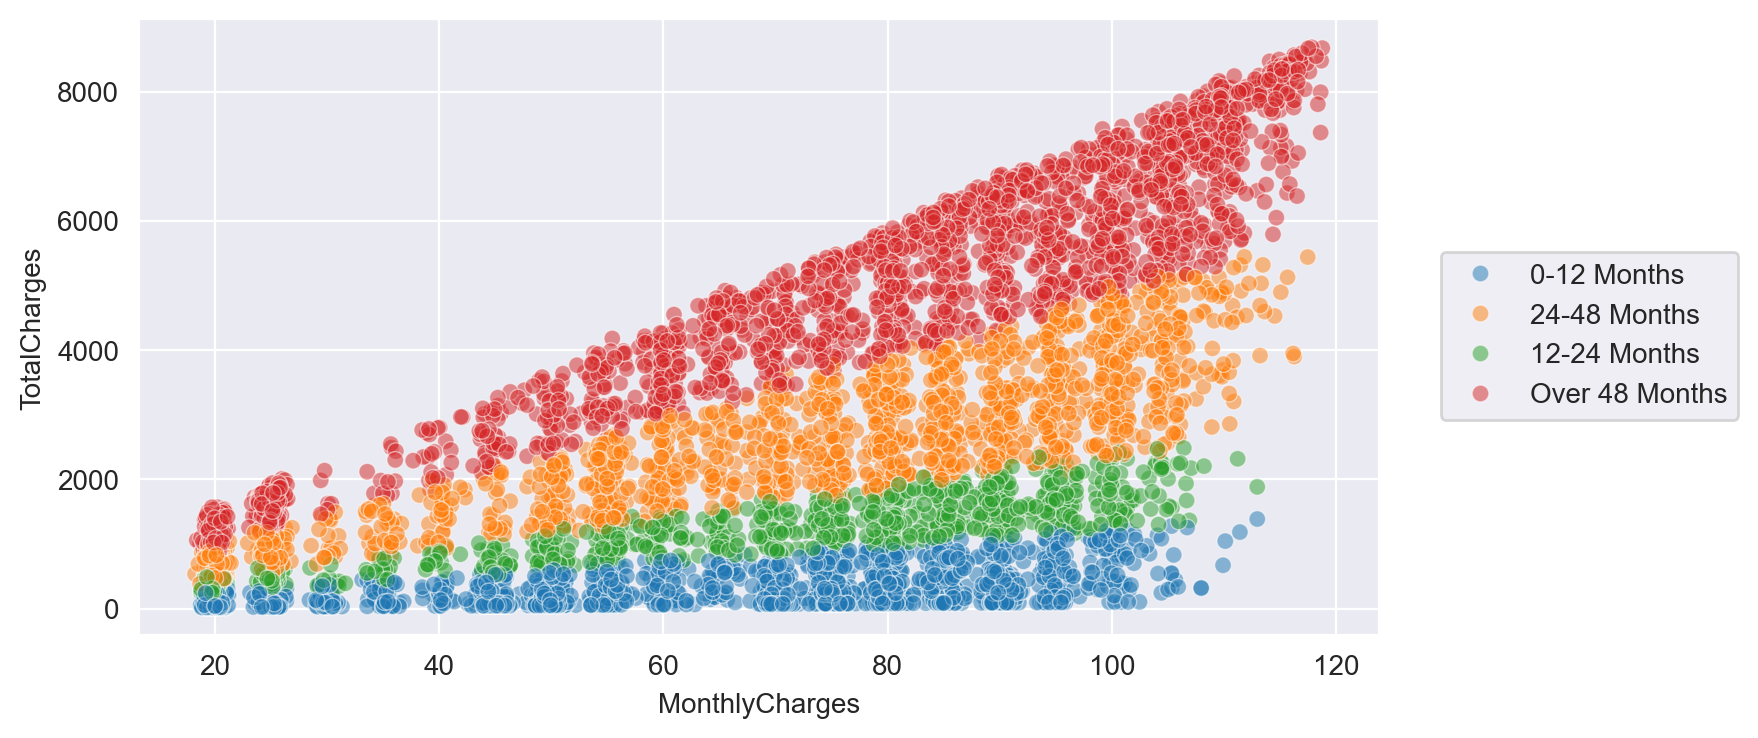

In [26]:
plt.figure(figsize=(8, 4), dpi=200)
sns.scatterplot(
    data=df,
    x="MonthlyCharges",
    y="TotalCharges",
    alpha=0.5,
    hue="Tenure Cohort",
    palette="tab10",
)
plt.legend(loc=(1.05, 0.35));
# present correlations between total charges and monthly charges for each tenure cohort

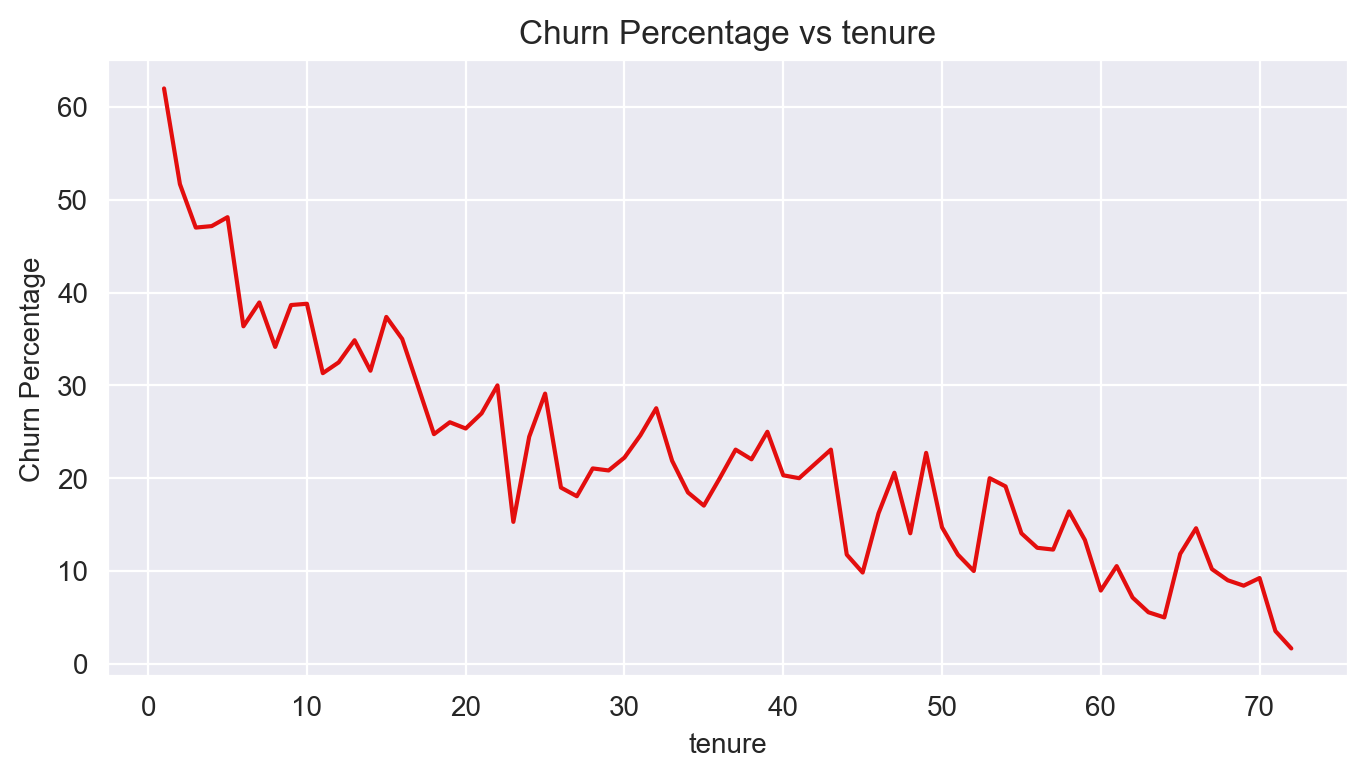

In [27]:
plt.figure(figsize=(8, 4), dpi=200)
plt.plot(np.arange(1, 73), percentage.iloc[0], color="#e30e0e")
plt.ylabel("Churn Percentage")
plt.xlabel("tenure")
plt.title("Churn Percentage vs tenure");

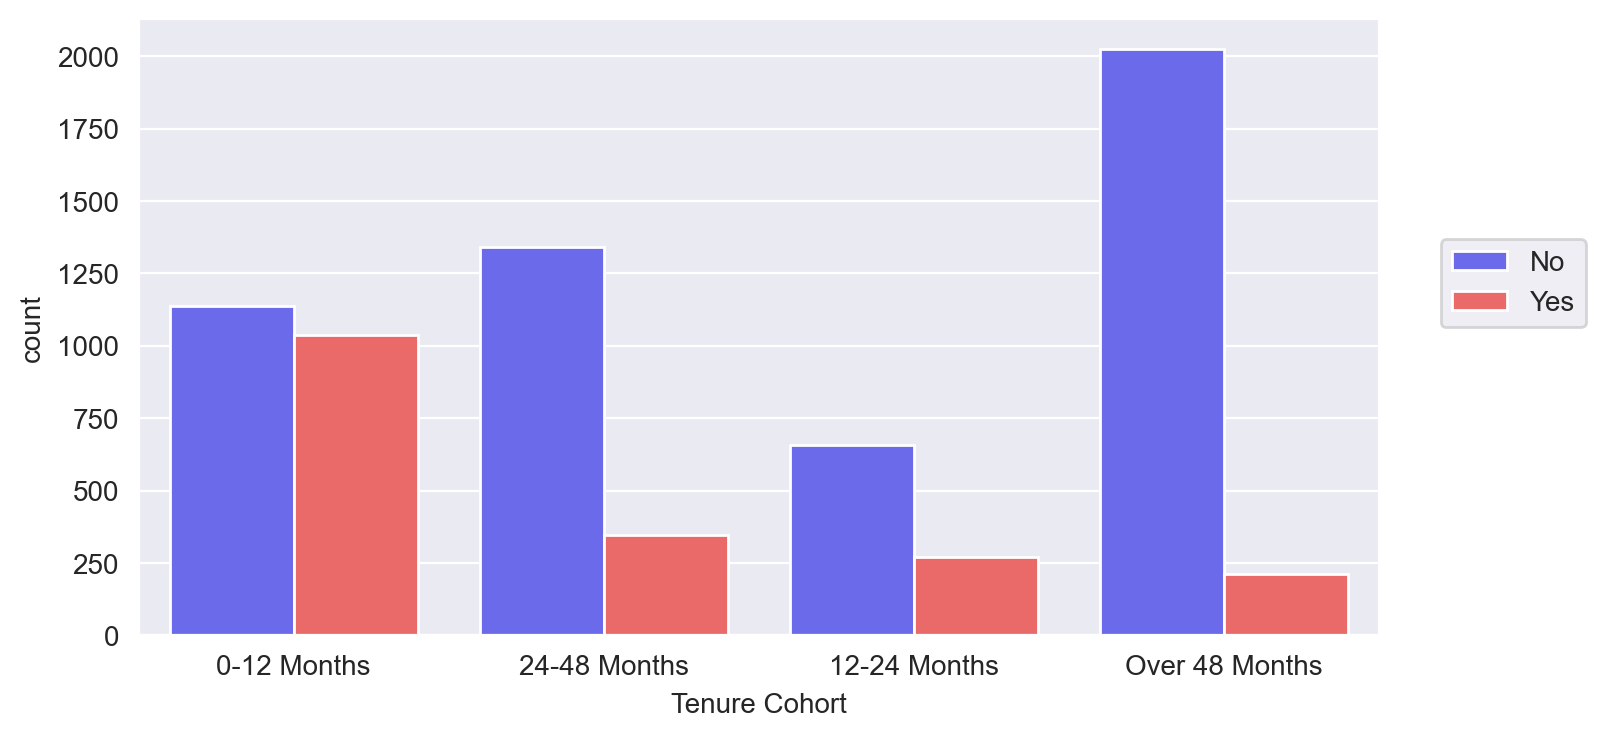

In [28]:
plt.figure(figsize=(8, 4), dpi=200)
sns.countplot(data=df, x="Tenure Cohort", hue="Churn", palette="seismic")
plt.legend(loc=(1.05, 0.5));

<Figure size 1600x1000 with 0 Axes>

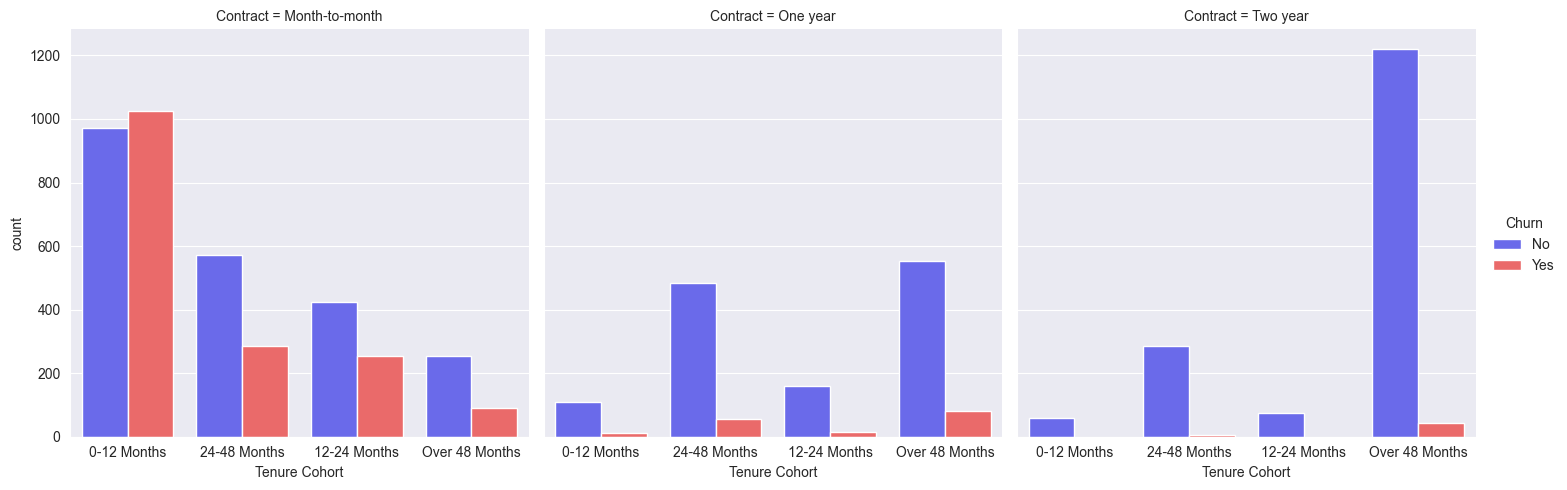

In [29]:
plt.figure(figsize=(8, 5), dpi=200)
sns.catplot(
    data=df,
    x="Tenure Cohort",
    hue="Churn",
    col="Contract",
    kind="count",
    palette="seismic",
);
# customers with longer contract and tenure are absolutely less likely to churn

### Checking if classes of our target (column "Churn") are balanced 

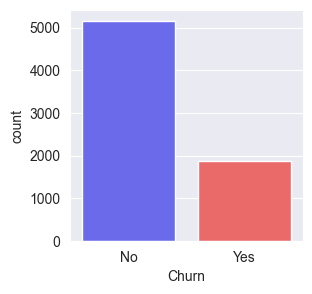

In [30]:
plt.figure(figsize=(3, 3))
sns.countplot(data=df, x="Churn", palette="seismic");

In [31]:
No_counts = df["Churn"].value_counts().iloc[0]
Yes_counts = df["Churn"].value_counts().iloc[1]

No_percentage = round(100 * (No_counts / (No_counts + Yes_counts)), 2)

In [32]:
print(f"Percentage of 'No' occurring in 'Churn' column: {No_percentage}%")
print(f"Percentage of 'Yes' occurring in 'Churn' column: {100-No_percentage}%")
# classes are not balanced 

Percentage of 'No' occurring in 'Churn' column: 73.42%
Percentage of 'Yes' occurring in 'Churn' column: 26.58%
